# <center> Predicting Churn for Bank Customers </center>

### Wczytanie bibliotek

In [1]:
import pandas as pd #data analysis

import seaborn as sns #visualization
import matplotlib.pyplot as plt  #visualization
%matplotlib inline
import plotly.offline as py  #visualization
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go  #visualization

### Wczytanie danych

In [2]:
df=pd.read_csv('churn/Churn_Modelling.csv',delimiter=',')

![Dane z Kaggle](churn/churn.png)

## Analiza

#### Początek pliku

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Koniec pliku

In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### Losowa próbka

In [7]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4716,4717,15805764,Hallahan,646,France,Male,18,10,0.00,2,0,1,52795.15,0
2852,2853,15771483,Arnold,609,France,Male,40,6,0.00,2,1,1,97416.34,0
5699,5700,15624667,Wallace,684,France,Male,35,6,135871.50,1,1,1,87219.41,0
5420,5421,15583462,Graham,695,France,Male,28,5,171069.39,2,1,1,88689.40,0
761,762,15582741,Maclean,693,France,Female,35,5,124151.09,1,1,0,88705.14,1


#### Ogólne informacje o zbiorze

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Statystyki

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

#### Rozkład zmiennych

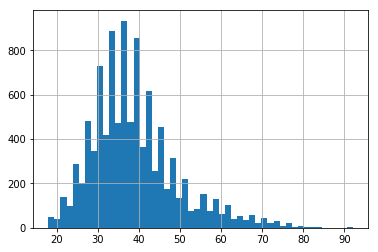

In [8]:
df['Age'].hist(bins=50)

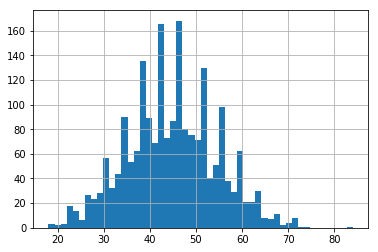

In [9]:
# wybieramy tych co odeszli
df[df['Exited']==1]['Age'].hist(bins=50)

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
delete=['RowNumber', 'CustomerId', 'Surname']
columns= [col for col in df.columns if col not in delete]

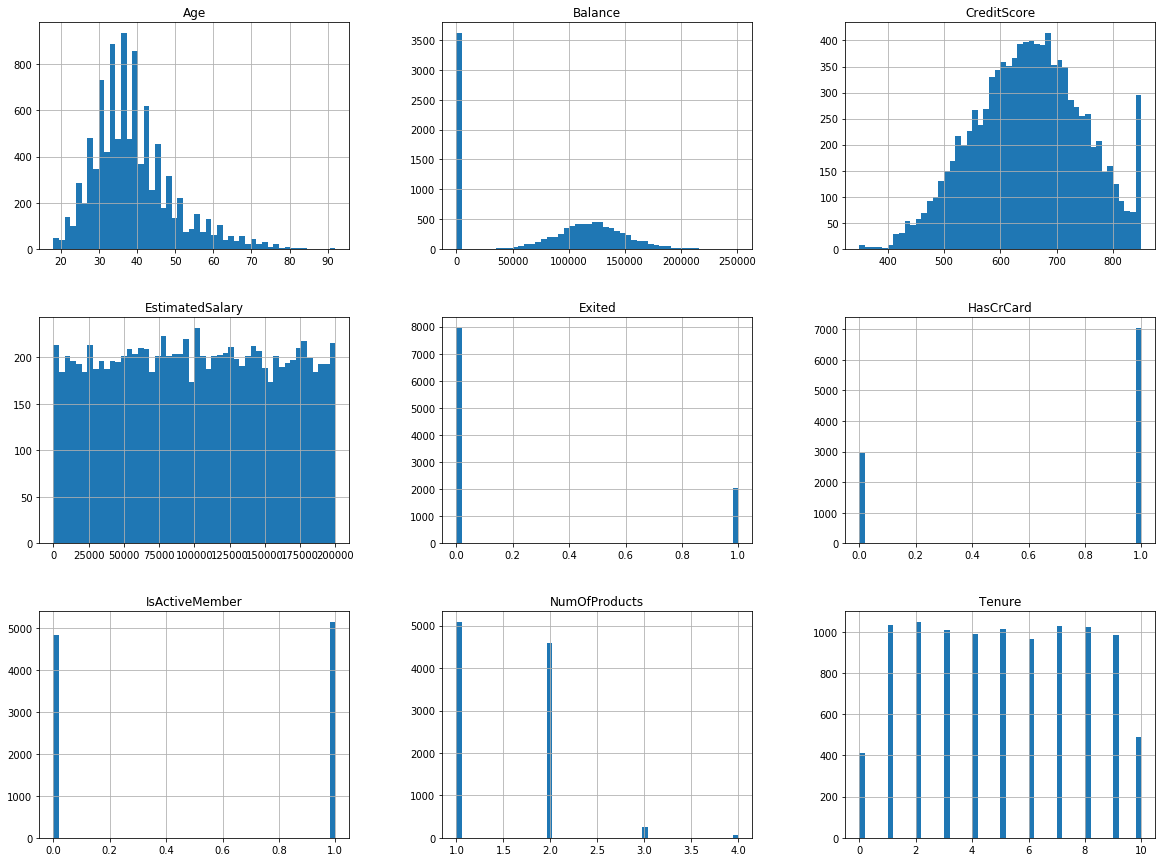

In [12]:
df[columns].hist(figsize=(20,15), bins=50)
plt.show()

#### Liczba wartości unikalnych

In [13]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### Czy są nulle?

In [14]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

#### Grupowanie

In [15]:
df.groupby(['Geography','Exited'])['Exited'].count()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [17]:
df.groupby(['Geography','Exited'])['EstimatedSalary'].agg(['max','mean','median'])

max           mean      median
Geography Exited                                      
France    0       199929.17   99217.097331   98045.045
          1       199378.58  103439.278296  103739.240
Germany   0       199970.74  102414.657876  103557.850
          1       199808.10   98403.886450   96498.135
Spain     0       199992.48   98602.369864   98768.455
          1       199304.74  103629.554818  108732.960

#### Nowe kolumny

In [16]:
df['credit_score_age']= df['CreditScore']/df['Age']
df['Gender_num']=df['Gender'].apply(lambda x: 1 if x=='Female' else 0)

#### Usuwanie kolumn

In [17]:
for x in delete:
    del df[x]

### Wizualizacja

In [18]:
df.sample(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,credit_score_age,Gender_num
7739,724,Spain,Male,41,5,0.00,1,0,1,115753.94,0,17.658537,0
8919,673,France,Male,32,8,121240.76,1,1,0,116969.73,0,21.031250,0
1979,644,France,Male,33,8,0.00,2,1,1,155294.17,0,19.515152,0
1160,513,France,Male,35,8,0.00,1,1,0,76640.29,1,14.657143,0


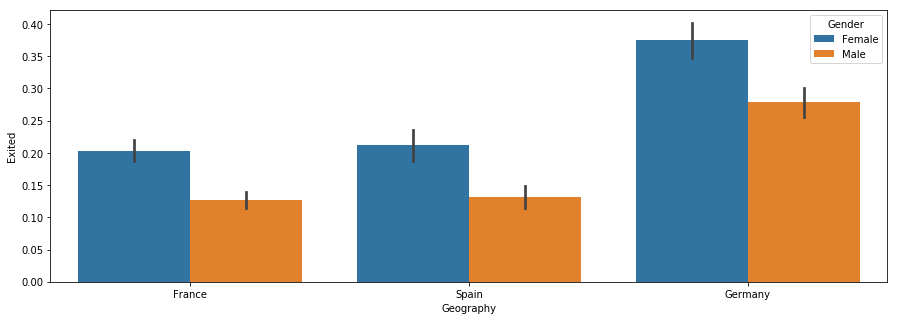

In [19]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Geography", y="Exited", hue='Gender', data=df)
plt.show();

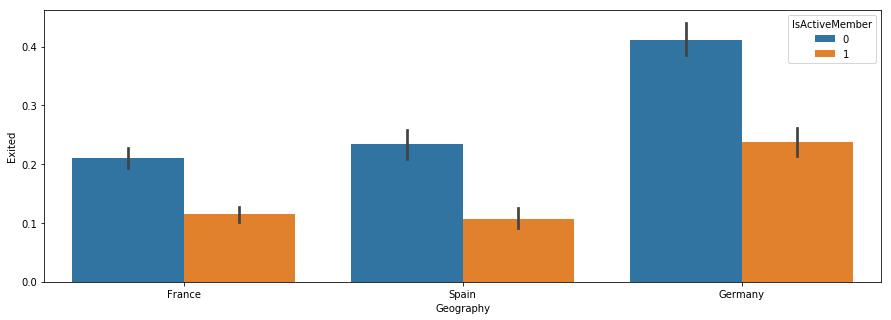

In [20]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Geography", y="Exited", hue='IsActiveMember', data=df)
plt.show();

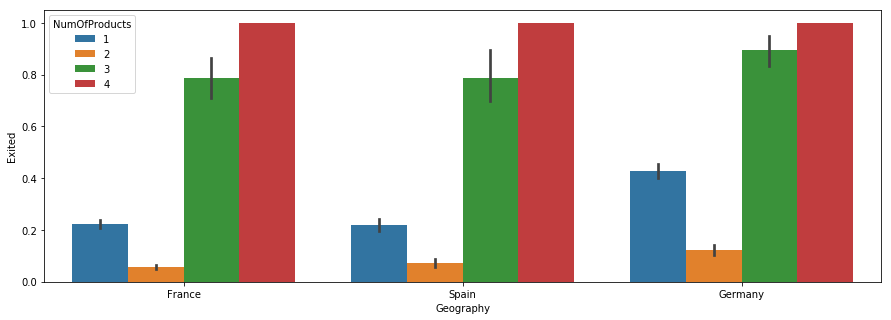

In [21]:
plt.figure(figsize=(15, 5))
sns.barplot(x="Geography", y="Exited", hue='NumOfProducts', data=df)
plt.show();

In [22]:
df[df['NumOfProducts']==4]['Exited'].value_counts()

1    60
Name: Exited, dtype: int64

In [23]:
churn     = df[df["Exited"] == 1]
not_churn = df[df["Exited"] == 0]

In [24]:
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5, color = "black")), opacity = .6) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5, color = "black" )), opacity = .6)
    
    data = [trace1,trace2]
    layout = go.Layout(dict(plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2),))
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [25]:
histogram('Age')

In [2]:
import geopandas

In [3]:
df_p = geopandas.read_file("data/Powiaty.shp")

In [41]:
gus_all = pd.read_csv('data/dane_1.csv',delimiter=';',dtype ={'Kod':'str','Nazwa':'str','Rok':'int','Wartosc':'str'})
gus_all['Kod_s']=gus_all['Kod'].astype('str').str.slice(start=0,stop=4)
gus_all['Wartosc']=gus_all['Wartosc'].str.replace(',','.').astype('float')/1000000
gus=gus_all[gus_all['Rok']==2014].copy()

In [44]:
def plot_choropleth(year=2014):
    gus=gus_all[gus_all['Rok']==year].copy()
    df_p = geopandas.read_file("data/Powiaty.shp")
    
    df_merged=df_p.merge(gus,left_on='JPT_KOD_JE',right_on='Kod_s',how='left')
    df_merged['Wartosc'].fillna(0,inplace=True)
    
    df_merged.plot(figsize=(20, 10),column='Wartosc',cmap = 'YlOrBr',legend=True,vmin=0,vmax=300)

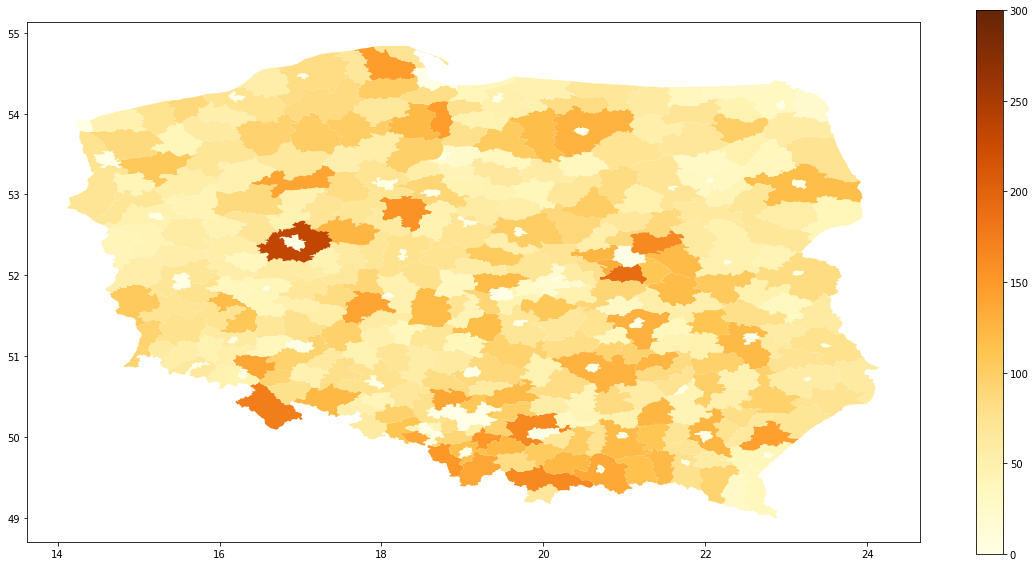

In [45]:
plot_choropleth(year=2014)

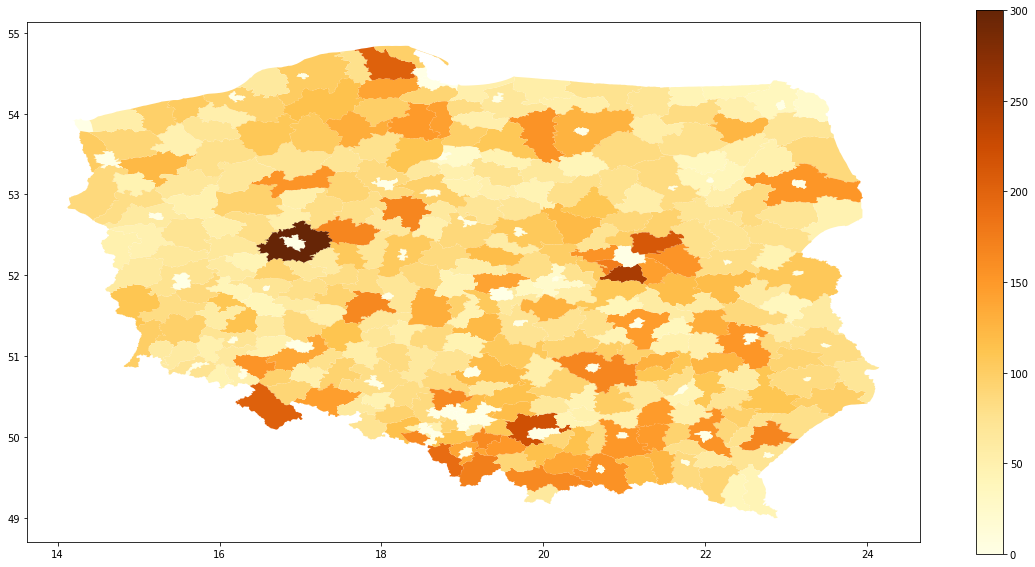

In [46]:
plot_choropleth(year=2018)

In [4]:
gus_all = pd.read_csv('data/dane_1.csv',delimiter=';',dtype ={'Kod':'str','Nazwa':'str','Rok':'int','Wartosc':'str'})
gus_all['Kod_s']=gus_all['Kod'].astype('str').str.slice(start=0,stop=4)
gus_all['Wartosc']=gus_all['Wartosc'].str.replace(',','.').astype('float')

gus14=gus_all[gus_all['Rok']==2014].copy()
gus18=gus_all[gus_all['Rok']==2018].copy()

In [5]:
df_merged=df_p.merge(gus14,left_on='JPT_KOD_JE',right_on='Kod_s',how='left')
df_merged['Wartosc'].fillna(0,inplace=True)

In [6]:
df_merged=df_merged.merge(gus18[['Kod_s','Wartosc']],left_on='JPT_KOD_JE',right_on='Kod_s',how='left')
df_merged['Wartosc_y'].fillna(0,inplace=True)
df_merged['diff']=(df_merged['Wartosc_y']-df_merged['Wartosc_x'])/1000000

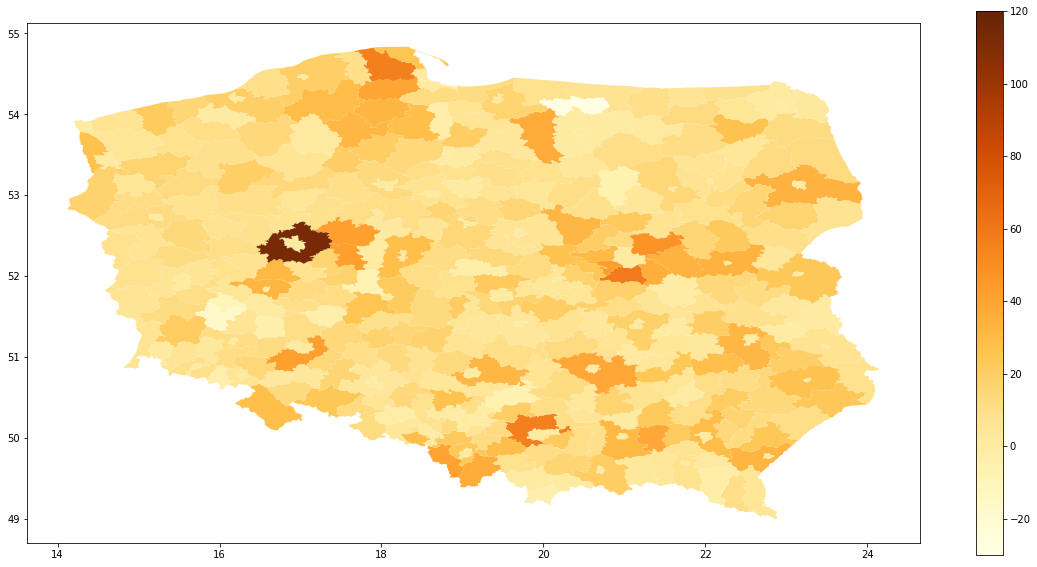

In [39]:
df_merged.plot(figsize=(20, 10),column='diff',cmap = 'YlOrBr',legend=True,vmin=-30,vmax=120)

In [23]:
gus_all_d = pd.read_csv('data/dotacje.csv',delimiter=';',dtype ={'Kod':'str','Nazwa':'str','Rok':'int','Wartosc':'str'})
gus_all_d['Kod_s']=gus_all_d['Kod'].astype('str').str.slice(start=0,stop=4)
gus_all_d['Wartosc']=gus_all_d['Wartosc'].str.replace(',','.').astype('float')

gus14d=gus_all_d[gus_all_d['Rok']==2014].copy()
gus18d=gus_all_d[gus_all_d['Rok']==2018].copy()

In [24]:
df_merged_d=df_p.merge(gus14d,left_on='JPT_KOD_JE',right_on='Kod_s',how='left')
df_merged_d['Wartosc'].fillna(0,inplace=True)

In [25]:
df_merged_d=df_merged_d.merge(gus18d[['Kod_s','Wartosc']],left_on='JPT_KOD_JE',right_on='Kod_s',how='left')
df_merged_d['Wartosc_y'].fillna(0,inplace=True)
df_merged_d['diff']=(df_merged_d['Wartosc_y']-df_merged_d['Wartosc_x'])/1000000

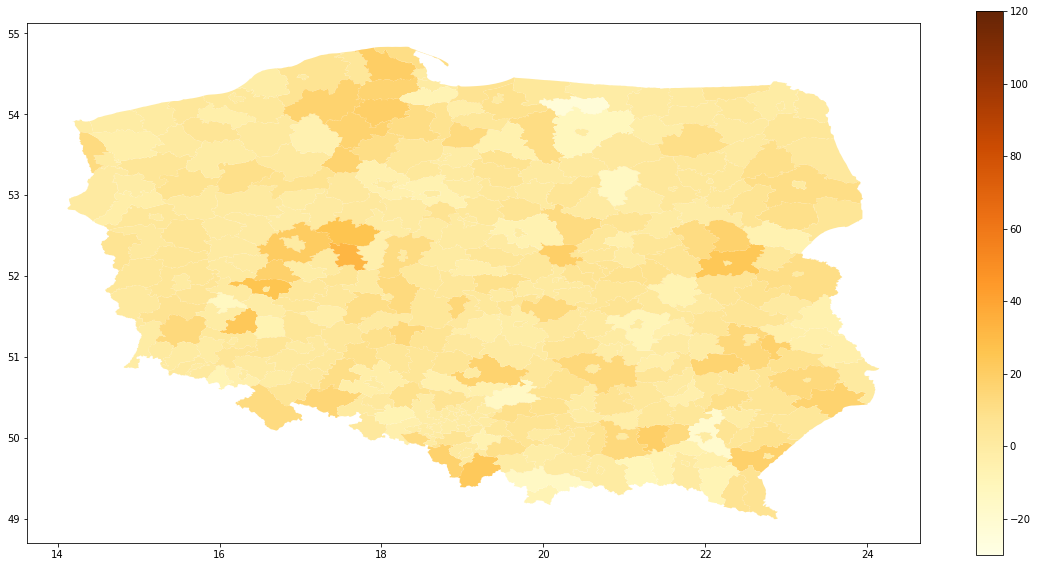

In [40]:
df_merged_d.plot(figsize=(20, 10),column='diff',cmap = 'YlOrBr',legend=True,vmin=-30,vmax=120)